<div style="border:solid Chocolate 2px; padding: 40px">

<b>Полина, привет!</b>

Меня зовут Евгений Головин, я буду ревьюером твоего проекта. Если ты не против, то предлагаю построить наше общение на "ты" ;) Если удобнее на "вы", то нет проблем, только скажи об этом. 

В ходе работы я оставил тебе комментарии <font color='green'>зеленого</font>, <font color='gold'>желтого</font> и <font color='red'>красного</font> цветов. Сейчас объясню, что они значат:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Решение на этом шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Решение на этом шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 Решение на этом шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
Увидев мой комментарий, не удаляй его, он будет очень полезен в случае повторной проверки работы :)
    
<div class="alert alert-info">
<b>А свой помечай вот так, чтобы я его не потерял ;)</b> 
</div>
    
На мои комменатрии можно и нужно реагировать, только делать это стоит так, чтобы твои и мои комменты не смешались: выделяй свои цветами, сильно отличающимися от моих.
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!

# Сборный проект

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Цель: проанализировать рынок игр, определенить наиболее популярные жанры, платформы, целевую аудиторию.

План работы над проектом:
Просмотреть таблицу и выявить аномалии и пропущенные значения.
Провести предобработку таблицы: замена столбцов, заполнение пропусков, удаление дубликатов и т.д.
Провести анализ по данным и подготовить актуальные данные.
Составить портреты пользователей для купных регионов продаж.
Выполнить проверку гипотез.
Оформить проект и сделать выводы по каждому шагу.

Датафрейм имеет следующую структуру:
Name — название игры
Platform — платформа
Year_of_Release — год выпуска
Genre — жанр игры
NA_sales — продажи в Северной Америке (миллионы долларов)
EU_sales — продажи в Европе (миллионы долларов)
JP_sales — продажи в Японии (миллионы долларов)
Other_sales — продажи в других странах (миллионы долларов)
Critic_Score — оценка критиков (максимум 100)
User_Score — оценка пользователей (максимум 10)
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Супер, что начинаешь с ввдения. Только давай еще добавить цель, напишем план работы и опишем данные с которыми будем работать?) 

<div class="alert alert-info">
<b>Добавила выше</b> 
</div>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

#### Шаг 1. Откройте файл с данными и изучите общую информацию

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.info()
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Вывод:
Заметили следующее:
1) В нескольких столбцах есть пропущенные значения. 2) Названия столбцов написаны не в нижнем регистре. 3) Год выпуска нужно заменить на integer.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Обзор данных выполнен) 

#### Шаг 2. Предобработка данных

Замените названия столбцов (приведите к нижнему регистру);
Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
Обработайте пропуски при необходимости:
Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
Опишите причины, которые могли привести к пропускам;
Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

Изменение название столбцов

In [3]:
new_columns = [column.lower() for column in data.columns]
new_columns

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

In [4]:
data.columns = new_columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Отлично!

Изменение типа данных
Изенения требуют столбцы:

year_of_release и critic_score в тип integer. Года и оценки критиков - целые числа.
user_score в тип float. Строковое значение "tbd" означает, что сейчас идет оценивание и по факту оценки нет, поэтому все "tbd" можно заменить на NaN.

In [5]:
data['year_of_release'] = pd.to_numeric(data['year_of_release'], downcast='integer', errors ='coerce')
data['critic_score'] = pd.to_numeric(data['critic_score'], errors ='coerce')
data['user_score'] = pd.to_numeric(data['user_score'], errors ='coerce')
data['user_score'] = data['user_score'].round(1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Видно, что из-за значения NaN столбец не переводится в тип int. Проведем перевод в нужный тип после восстановления или удаления строк.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Попрубуй через errors='coerce'

<div class="alert alert-info">
<b>Добавила, тип данных все равно не поменялся</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Подкорреткировал тебе немного код) 

<div class="alert alert-info">
<b>Спасибо)</b> 
</div>

In [6]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Обработка пропусков
Определение значимых и восстанавливаемых пропусков данных:

Возможно восстановить
year_of_release. В названиях могут присутствовать год. Для спортивных игр надо учитывать, что написаный год может означать год конца сезона. Пример FIFA 2004 это про сезон 2003/2004 года по футболу. Значит игру выпускают перед началом сезона, тоесть в 2003.
rating. ESRB часто повторяет один и тот де тип оценки для одинаковых жанров. Восстановим их используя популярный ESRB рейтинг в жанре.
Нетребующие восстановления
Строки 659 и 14244. Они будут удалены.
Невозможно восстановить
critic_score и user_score. В этих столбцах нельзя выявить средние или медианные закономерности по году или жанру. Каждая игра получается индивидуальной и оценка критиков, и пользователей - субъективное мнение об игре конкретного года, жанра, платформы, студии разработчика, издателя, рекламы и репутации о серии игр. Слишком много факторов необходимо учесть для восстановления данных.
Удаление строк 659 и 14244.

In [7]:
data.drop([659, 14244],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Поддерживаю

Восстановление и удаление значений по столбцу year_of_release. Для игр с годом в названии проанализируем жанр.

In [8]:
nan_year_data = data[data['year_of_release'].isna()]
nan_year_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [9]:
def fill_year(row):
    year = 0
    last_word = ''
    genre = row[3]
    for word in row[0].split():
        try:
            last_word = word
            year = int(word)
        except:
            continue
    if genre in ('Sports', 'Racing', 'Fighting'):
        if year > 2000 or last_word in ('2K6','2K8'):
            if genre == 'Sports':
                year -=1
            if last_word == '2K6':
                year = 2005
            elif last_word == '2K8':
                year = 2007
            if year < 2017 and np.isnan(row[2]):
                row[2] = year
    return row

data = data.apply(fill_year, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16462 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Для аналитики не нужны игры без года создания, т.к. данные не могут быть актуальными на выбранный позднее период.

In [10]:
data.drop(data[data['year_of_release'].isna()].index,inplace=True)
data['year_of_release'] = pd.to_numeric(data['year_of_release'], downcast='integer')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16462 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16462 non-null  object 
 1   platform         16462 non-null  object 
 2   year_of_release  16462 non-null  int16  
 3   genre            16462 non-null  object 
 4   na_sales         16462 non-null  float64
 5   eu_sales         16462 non-null  float64
 6   jp_sales         16462 non-null  float64
 7   other_sales      16462 non-null  float64
 8   critic_score     7997 non-null   float64
 9   user_score       7473 non-null   float64
 10  rating           9781 non-null   object 
dtypes: float64(6), int16(1), object(4)
memory usage: 1.4+ MB


<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Пропусков в данном столбце не очень много, можно смело удалить) 

Восстановление рейтинга ESRB. Определение самой популярной оценки для жанра и составим словарь.

In [11]:
genre_list = data['genre'].unique()
genre_dict = {}
for genre in genre_list:
    print('Популярные оценки для жанра ', genre)
    rating_value_counts = data[data['genre'] == genre]['rating'].value_counts()
    print(rating_value_counts)
    genre_dict[genre] = rating_value_counts.index[0]
    
genre_dict

Популярные оценки для жанра  Sports
E       1173
T        195
E10+     106
M         16
Name: rating, dtype: int64
Популярные оценки для жанра  Platform
E       354
E10+    141
T        63
M         3
Name: rating, dtype: int64
Популярные оценки для жанра  Racing
E       577
T       167
E10+     95
M        18
Name: rating, dtype: int64
Популярные оценки для жанра  Role-Playing
T       415
M       161
E10+    111
E        83
Name: rating, dtype: int64
Популярные оценки для жанра  Puzzle
E       284
E10+     42
T        10
Name: rating, dtype: int64
Популярные оценки для жанра  Misc
E       449
T       228
E10+    166
M        13
EC        5
K-A       1
Name: rating, dtype: int64
Популярные оценки для жанра  Shooter
M       553
T       340
E10+     56
E        47
Name: rating, dtype: int64
Популярные оценки для жанра  Simulation
E       321
T       186
E10+     47
M         5
Name: rating, dtype: int64
Популярные оценки для жанра  Action
T       670
M       596
E10+    468
E       410
A

{'Sports': 'E',
 'Platform': 'E',
 'Racing': 'E',
 'Role-Playing': 'T',
 'Puzzle': 'E',
 'Misc': 'E',
 'Shooter': 'M',
 'Simulation': 'E',
 'Action': 'T',
 'Fighting': 'T',
 'Adventure': 'E',
 'Strategy': 'T'}

In [12]:
data['rating'] = data['rating'].fillna('NR')

def fill_rating(row):
    if row[10] == 'NR':
        row[10] = genre_dict[row[3]]
    return row

data = data.apply(fill_rating, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16462 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16462 non-null  object 
 1   platform         16462 non-null  object 
 2   year_of_release  16462 non-null  int64  
 3   genre            16462 non-null  object 
 4   na_sales         16462 non-null  float64
 5   eu_sales         16462 non-null  float64
 6   jp_sales         16462 non-null  float64
 7   other_sales      16462 non-null  float64
 8   critic_score     7997 non-null   float64
 9   user_score       7473 non-null   float64
 10  rating           16462 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [13]:
data['rating'].value_counts()

E       7695
T       5524
M       1836
E10+    1394
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Отлично!

Удаление дупликатов

In [14]:
data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16462 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16462 non-null  object 
 1   platform         16462 non-null  object 
 2   year_of_release  16462 non-null  int64  
 3   genre            16462 non-null  object 
 4   na_sales         16462 non-null  float64
 5   eu_sales         16462 non-null  float64
 6   jp_sales         16462 non-null  float64
 7   other_sales      16462 non-null  float64
 8   critic_score     7997 non-null   float64
 9   user_score       7473 non-null   float64
 10  rating           16462 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Поиск дупликатов по названию игры, платформе и году.

In [15]:
part_data = data.loc[:, 'name':'year_of_release']
part_data.drop_duplicates()
part_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16462 entries, 0 to 16714
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             16462 non-null  object
 1   platform         16462 non-null  object
 2   year_of_release  16462 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 514.4+ KB


<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Хорошечно. Явные и неявные дубли проверили

Добавление столбца "Продажи по миру"

In [16]:
data['world_sales'] = (data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'])
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,T,31.38


Вывод:
Данные готовы к анализу. Было выполнено следующее.

Название столбцов было приведено к нижнему регистру
Восстановлены пропуски в строках.
Удалены строки без нужных данных.
Добавлен столбец суммарных продаж.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1<a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Столбец добавлен верно, но для подсчета суммарных продаж рекомендую использовать следующую конструкцию 
    
    
    games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

<div class="alert alert-info">
<b>Спасибо! Буду знать</b> 
</div>

#### Шаг 3. Проведите исследовательский анализ данных

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
Соотнесите выводы с продажами игр на других платформах.
Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [17]:
year_of_release_pivot_table = pd.pivot_table(data, index='year_of_release', values='name', aggfunc='count')
year_of_release_pivot_table.columns = ['games_count']
year_of_release_pivot_table

,games_count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Text(0.5, 0, 'год')

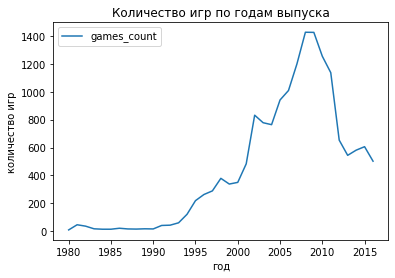

In [18]:
year_of_release_pivot_table.plot(title = 'Количество игр по годам выпуска', ylabel='количество игр').set_xlabel("год")

Данные по всем периодам не важны.

С 1980 годов по 1993 было мало компаний и мало охвата игроков, как и качественных оценок от критиков. Тенденция выпускать больше игр пришла вместе с технологическим прорывом: появлением персонального компьютера (PC) и технологий языков программирования.

В 2002 году видно, что выпустилось много игр. Это значит в период с 1997 по 2002 появились игровые движки для создания реалистичных игр и новые средства программирования.

Пик в 2009 это не только популярность к созданию компьютерных игр, но и распространенность компьютерных движков, некоторые из которых бесплатны к использованию на сегодняшний день.

Спад индустри игр с 2012 по 2016 обусловлен экономическим кризисом и требованиям к игре. Крупные студии-разработчики как Blizzard создают игры по 10-15 лет, так как хотят порадовать своих фанатов новым гемплеем, современными технологиями и новой графикой.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1 <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  График рассмотрен верно, с выводами согласен. Не хватает оформления. Давай добавим подписи осей и заголовков? 

<div class="alert alert-info">
<b>Добавила в графике</b> 
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v2 <a class="tocSkip"></h2>
   
<b>На доработку🤔:</b> Оси и заголовок должны быть подписаны на русском языке) Оси Х и ось У

<div class="alert alert-info">
<b>Подписала на русском</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v3 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Исправлено) 

,world_sales
platform,
PS2,1247.53
X360,961.30
PS3,931.34
Wii,891.18
DS,802.79
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.69


<AxesSubplot:title={'center':'Продажи по платформам'}, xlabel='платформы', ylabel='количество продаж'>

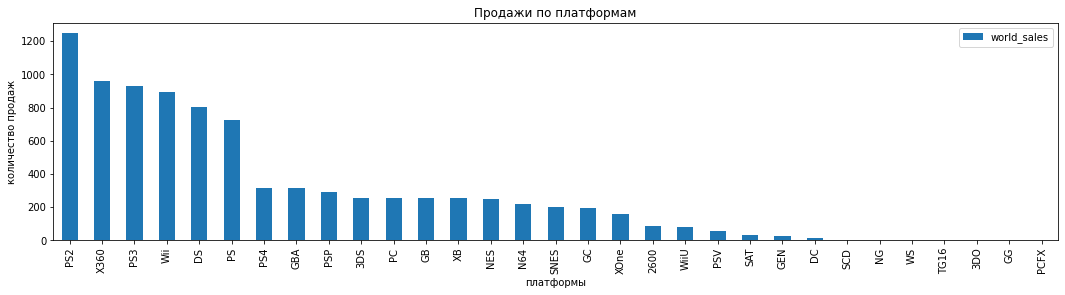

In [19]:
platform_sales_pivot_table = pd.pivot_table(data, index=['platform'], values='world_sales', aggfunc='sum')
platform_sales_pivot_table = platform_sales_pivot_table.sort_values('world_sales',ascending=False)
display(platform_sales_pivot_table)
platform_sales_pivot_table.plot(kind='bar',y='world_sales',title = 'Продажи по платформам', figsize=(18,4),xlabel='платформы',ylabel='количество продаж')

Рассмотрим первую шестерку платформ по годам.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Визуализируем?

<div class="alert alert-info">
<b>Добавила bar после таблицы</b> 
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v2 <a class="tocSkip"></h2>
   
<b>На доработку🤔:</b> Так же не хватает подписи осей и заголовков на русском языке(

<div class="alert alert-info">
<b>Исправила</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v3 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> +++

In [20]:
best_sales_platform = list(platform_sales_pivot_table.index[:6])
best_sales_platform

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [21]:
data.loc[15957, 'year_of_release'] = 2007

Платформа  PS2


world_sales
platform year_of_release             
PS2      2000                   39.17
         2001                  166.43
         2002                  205.78
         2003                  194.27
         2004                  212.13
         2005                  160.91
         2006                  106.46
         2007                   75.99
         2008                   53.90
         2009                   26.40
         2010                    5.64
         2011                    0.45

<AxesSubplot:title={'center':'Продажи по платформе'}, xlabel='год', ylabel='количество продаж'>


Платформа  X360


world_sales
platform year_of_release             
X360     2005                    8.25
         2006                   51.63
         2007                   95.41
         2008                  135.26
         2009                  120.29
         2010                  170.03
         2011                  143.89
         2012                   99.74
         2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52

<AxesSubplot:title={'center':'Продажи по платформе'}, xlabel='год', ylabel='количество продаж'>


Платформа  PS3


world_sales
platform year_of_release             
PS3      2006                   20.96
         2007                   73.19
         2008                  118.52
         2009                  130.93
         2010                  142.17
         2011                  156.78
         2012                  107.36
         2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60

<AxesSubplot:title={'center':'Продажи по платформе'}, xlabel='год', ylabel='количество продаж'>


Платформа  Wii


world_sales
platform year_of_release             
Wii      2006                  137.15
         2007                  152.77
         2008                  171.32
         2009                  206.97
         2010                  127.95
         2011                   59.65
         2012                   21.71
         2013                    8.59
         2014                    3.75
         2015                    1.14
         2016                    0.18

<AxesSubplot:title={'center':'Продажи по платформе'}, xlabel='год', ylabel='количество продаж'>


Платформа  DS


world_sales
platform year_of_release             
DS       2004                   17.27
         2005                  130.14
         2006                  119.81
         2007                  146.97
         2008                  145.31
         2009                  119.54
         2010                   85.02
         2011                   26.18
         2012                   11.01
         2013                    1.54

<AxesSubplot:title={'center':'Продажи по платформе'}, xlabel='год', ylabel='количество продаж'>


Платформа  PS


world_sales
platform year_of_release             
PS       1994                    6.03
         1995                   35.96
         1996                   94.70
         1997                  136.17
         1998                  169.49
         1999                  144.53
         2000                   96.37
         2001                   35.59
         2002                    6.67
         2003                    2.07

<AxesSubplot:title={'center':'Продажи по платформе'}, xlabel='год', ylabel='количество продаж'>

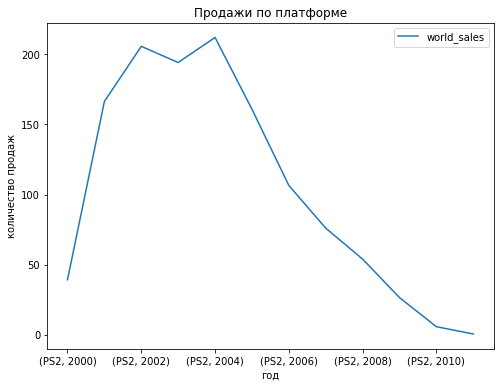

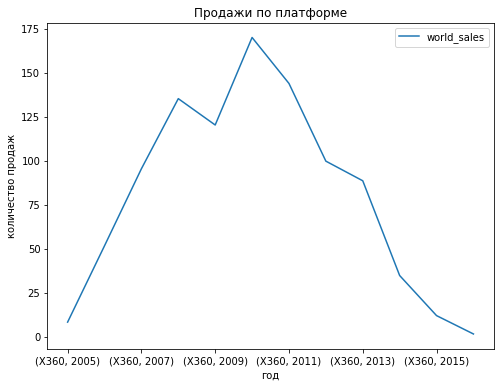

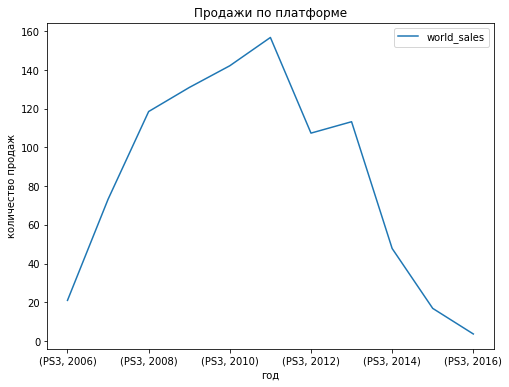

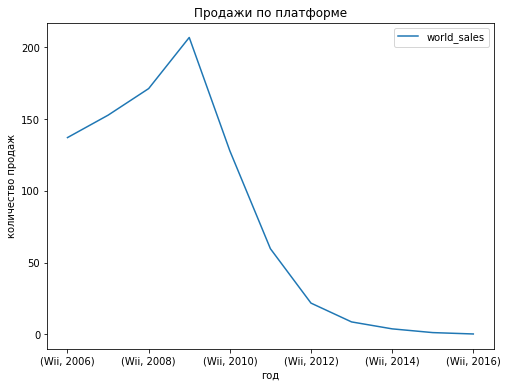

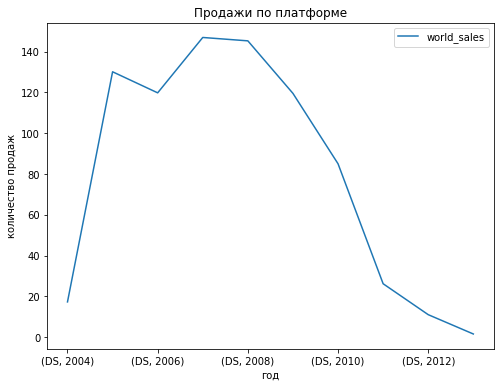

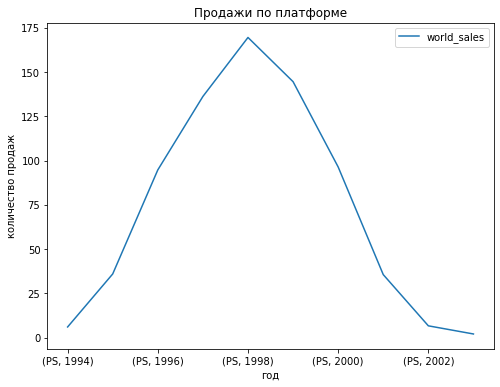

In [22]:
for platform in best_sales_platform:
    print('Платформа ',platform)
    platform_sales_pivot_table = pd.pivot_table(data.query('platform == @platform'), index=['platform','year_of_release'], values='world_sales', aggfunc='sum')
    display(platform_sales_pivot_table)
    display(platform_sales_pivot_table.plot(title = 'Продажи по платформе',figsize=(8,6),xlabel='год',ylabel='количество продаж'))
    print()

In [23]:
print('Платформа ','PS4')
platform_sales_pivot_table = pd.pivot_table(data.query('platform == "PS4"'), 
                                            index=['platform','year_of_release'], 
                                            values='world_sales', aggfunc='sum')
print(platform_sales_pivot_table)
print()

Платформа  PS4
                          world_sales
platform year_of_release             
PS4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25



Для платформ, которые пользуются популярностью, срок использования равен 8-12 лет. Можно проследить, как менялись поколения для приствок PlayStation:

PS 1994-2003
PS2 2000-2011
PS3 2006-2016
PS4 2013-по сегодняшний день
Получается каждые 5-7 лет компания Sony выпускает новую платформу с лучшими техническими параметрами, а игры на предыдущей платформе еще существуют на рынке 3 года.

Подготовим данные для вопроса 3 и дадим ответ.

Актуальным периодом по продажам считаю с 2013 по 2016 год.

Появление на рынке новой платформы PS4 говорит от том, что она просуществует 2-4 года и топ продаж для этой платформы ожидается на 2017 год.
После падения суммарных продаж с 2013 года появилась тенденция к росту продаж игр за счет их качества, а не количества.
Большинство студий разработчиков создают игры за 2-4 года, так что в 2017 попадут игры, разработка которых ведется с 2013 года.
Хорошие игры на рынке продаются в течении нескольких лет.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Полностью согласен со средним сроком жизни платформ, но было бы здорово рассмотреть продажи с помощью графиков, это гораздо наглядней

<div class="alert alert-info">
<b>Вывела графики</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Хорошо, для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватишь уже отжившие тренды. Но и слишком короткий период тоже брать не стоит

In [24]:
actual_data_games_sales = data.query('year_of_release > 2012')
actual_data_games_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  world_sales      2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


In [25]:
actual_data_games_sales.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,M,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,T,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Определим самые прибыльные платформы за актуальный период.

In [26]:
best_sales_platform = pd.pivot_table(actual_data_games_sales, index=['platform','year_of_release'], 
                                     values='world_sales', aggfunc = 'sum')
best_sales_platform

world_sales
platform year_of_release             
3DS      2013                   56.57
         2014                   43.76
         2015                   27.78
         2016                   15.14
DS       2013                    1.54
PC       2013                   12.38
         2014                   13.28
         2015                    8.52
         2016                    5.25
PS3      2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60
PS4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25
PSP      2013                    3.14
         2014                    0.24
         2015                    0.12
PSV      2013                   10.59
         2014                   11.90
         2015                    6.25
         2016                    4.25
Wii      2013                    8.59
         2014                    3.75
         2015                    1.14
         2016                    0.18
WiiU     2013                   21.65
         2014                   22.03
         2015                   16.35
         2016                    4.60
X360     2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

,world_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


<AxesSubplot:title={'center':'Продажи топ-5 платформ'}, xlabel='платформа', ylabel='продажи'>

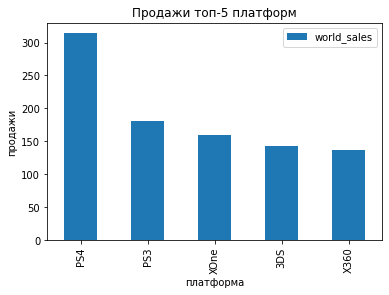

In [27]:
best_sales_platform = pd.pivot_table(actual_data_games_sales, index='platform', 
                                     values='world_sales', aggfunc = 'sum')
best_sales_platform_table = best_sales_platform.sort_values('world_sales', ascending=False)
display(best_sales_platform_table)
best_sales_platform_table[0:5].plot(kind='bar',y='world_sales',title = 'Продажи топ-5 платформ', figsize=(6,4),xlabel='платформа',ylabel='продажи')

Топ 5 платформ по миру: PS4, PS3, XOne, X360 и 3DS. Их суммарный доход за 3 года около 1 миллиарда долларов.

Продажи растут у PS4, XOne, 3DS, WiiU и PSV, так как они заменяют предыдущее поколение игровых приставок. На убыль идут приставки предыдущего поколения PS3, X360, DS, Wii и PSP соотвественно. Так же можно заметить прирост у PC.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1 <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Давай визуализаруем топ платформ по акутальному периоду?

<div class="alert alert-info">
<b>Добавила график после таблицы</b> 
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v2 <a class="tocSkip"></h2>
   
<b>На доработку🤔:</b> Супер! Доработаем офрмление графика?)

<div class="alert alert-info">
<b>Да, поправила)</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v3 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Исправлено

count    2233.000000
mean        0.488442
std         1.235226
min         0.010000
25%         0.030000
50%         0.110000
75%         0.400000
max        21.050000
Name: world_sales, dtype: float64

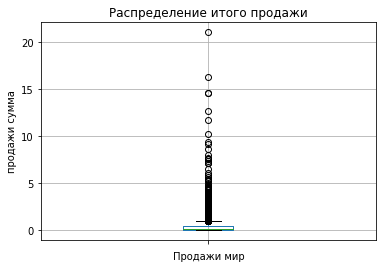

In [28]:
ax = plt.subplot()
ax = actual_data_games_sales.boxplot(column = 'world_sales',ax=ax).set_title('Распределение итого продажи')

plt.gca().set_ylabel('продажи сумма')
plt.gca().set_xlabel('Продажи мир')

plt.gca().set_xticklabels([])

actual_data_games_sales['world_sales'].describe()

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: world_sales, dtype: float64

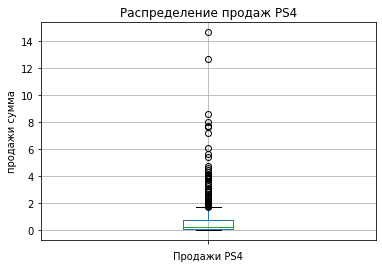

In [29]:
PS4_actual_data_games_sales = actual_data_games_sales.query('platform =="PS4"')
ax = plt.subplot()

ax = PS4_actual_data_games_sales.boxplot(column = 'world_sales').set_title('Распределение продаж PS4')

plt.gca().set_ylabel('продажи сумма')
plt.gca().set_xlabel('Продажи PS4')

plt.gca().set_xticklabels([])

PS4_actual_data_games_sales['world_sales'].describe()

count    345.000000
mean       0.525884
std        1.451939
min        0.010000
25%        0.040000
50%        0.150000
75%        0.510000
max       21.050000
Name: world_sales, dtype: float64

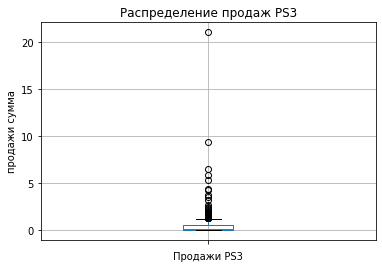

In [30]:
PS3_actual_data_games_sales = actual_data_games_sales.query('platform =="PS3"')
ax = plt.subplot()
ax = PS3_actual_data_games_sales.boxplot(column = 'world_sales').set_title('Распределение продаж PS3')

plt.gca().set_ylabel('продажи сумма')
plt.gca().set_xlabel('Продажи PS3')

plt.gca().set_xticklabels([])

PS3_actual_data_games_sales['world_sales'].describe()

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: world_sales, dtype: float64

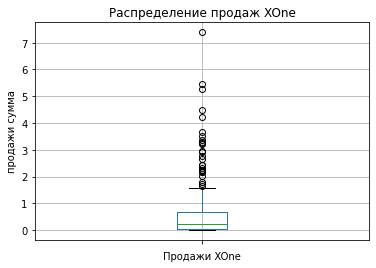

In [31]:
XOne_actual_data_games_sales = actual_data_games_sales.query('platform =="XOne"')
ax = plt.subplot()
ax = XOne_actual_data_games_sales.boxplot(column = 'world_sales').set_title('Распределение продаж XOne')
plt.gca().set_ylabel('продажи сумма')
plt.gca().set_xlabel('Продажи XOne')

plt.gca().set_xticklabels([])
XOne_actual_data_games_sales['world_sales'].describe()

count    186.000000
mean       0.735484
std        1.663275
min        0.010000
25%        0.080000
50%        0.265000
75%        0.795000
max       16.270000
Name: world_sales, dtype: float64

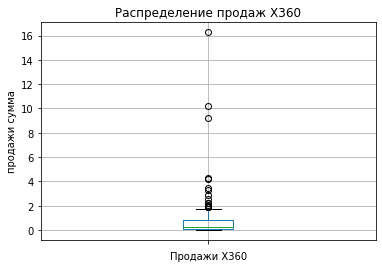

In [32]:
X360_actual_data_games_sales = actual_data_games_sales.query('platform =="X360"')
ax = plt.subplot()
ax = X360_actual_data_games_sales.boxplot(column = 'world_sales').set_title('Распределение продаж X360')
plt.gca().set_ylabel('продажи сумма')
plt.gca().set_xlabel('Продажи X360')

plt.gca().set_xticklabels([])
X360_actual_data_games_sales['world_sales'].describe()

count    303.000000
mean       0.472772
std        1.381347
min        0.010000
25%        0.040000
50%        0.090000
75%        0.280000
max       14.600000
Name: world_sales, dtype: float64

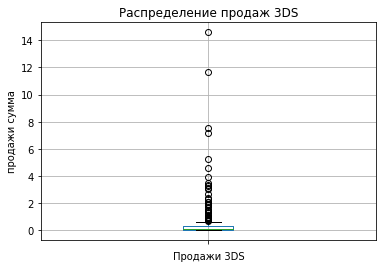

In [33]:
_3DS_actual_data_games_sales = actual_data_games_sales.query('platform =="3DS"')
ax = plt.subplot()
ax = _3DS_actual_data_games_sales.boxplot(column = 'world_sales').set_title('Распределение продаж 3DS')

plt.gca().set_ylabel('продажи сумма')
plt.gca().set_xlabel('Продажи 3DS')

plt.gca().set_xticklabels([])
_3DS_actual_data_games_sales['world_sales'].describe()

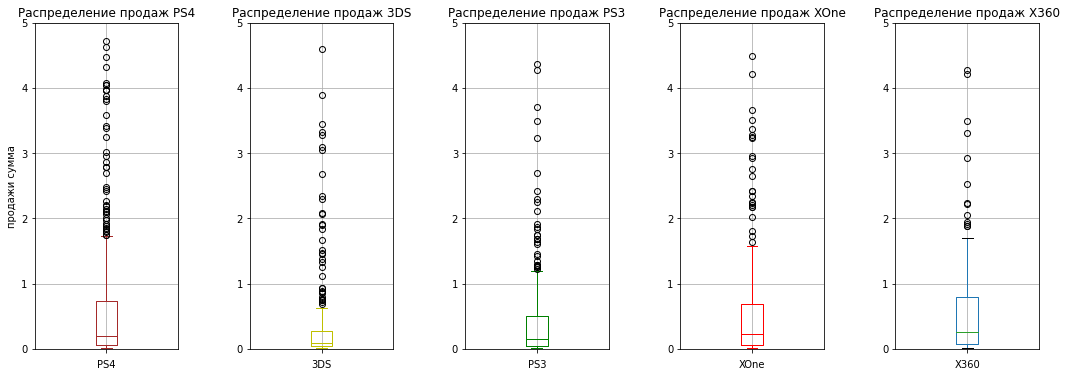

In [34]:
fig, ax = plt.subplots(1, 5, figsize=(18, 6))

PS4_actual_data_games_sales.boxplot('world_sales', ax=ax[0],color='brown')
ax[0].set_xlabel('PS4')
_3DS_actual_data_games_sales.boxplot('world_sales', ax=ax[1],color='y')
ax[1].set_xlabel('3DS')
PS3_actual_data_games_sales.boxplot('world_sales', ax=ax[2],color='g')
ax[2].set_xlabel('PS3')
XOne_actual_data_games_sales.boxplot('world_sales', ax=ax[3],color='r')
ax[3].set_xlabel('XOne')
X360_actual_data_games_sales.boxplot('world_sales', ax=ax[4])
ax[4].set_xlabel('X360')

ax[0].set_ylim([0,5])
ax[0].set_ylabel('продажи сумма')
ax[0].set_title('Распределение продаж PS4')
ax[1].set_ylim([0,5])
ax[1].set_title('Распределение продаж 3DS')
ax[2].set_ylim([0,5])
ax[2].set_title('Распределение продаж PS3')
ax[3].set_ylim([0,5])
ax[3].set_title('Распределение продаж XOne')
ax[4].set_ylim([0,5])
ax[4].set_title('Распределение продаж X360')
plt.subplots_adjust(wspace=0.5) 


for subplot in ax:
    subplot.set_xticklabels([])

plt.show()

Разница в продажах отличается. Имеются очень популярные игры, которые продаются годами и дают много прибыли, таковых единицы. И много игр, которые не смогли преодолеть порог в 400 тыс. долларов за выбранный период.

Период 2013-2016 год

Средняя выручка на игру по миру: 488 тыс. дол. 3/4 игр заработали до 400 тыс. Рекорд 21 млн.
Средняя выручка на игру по платформе PS4: 801 тыс. 3/4 игр заработали до 730 тыс. Рекорд 14,6 млн.
Средняя выручка на игру по платформе PS3: 526 тыс. 3/4 игр заработали до 510 тыс. Рекорд 21 млн.
Средняя выручка на игру по платформе XOne: 645 тыс. 3/4 игр заработали до 685 тыс. Рекорд 7,4 млн.
Средняя выручка на игру по платформе X360: 735 тыс. 3/4 игр заработали до 795 тыс. Рекорд 16,3 млн.
Средняя выручка на игру по платформе 3DS: 472 тыс. 3/4 игр заработали до 280 тыс. Рекорд 14,6 млн.
Для PS4, PS3 и 3DS видна положительная тенденция к росту продаж. Средняя больше 3го квантиля, это значит на эти платформы делаются более популярные и продаваемые игры, чем на XOne и X360.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1 <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Масштабы разные на графиках, поэтому сравнивать трудно. Давай отобразить вообще на одном полотне, или через subplot с одинаковым масштабом? И не забывай ограничивать выбросы сверху

<div class="alert alert-info">
<b>Сделала на графиках рядом, чтобы можно было сравить</b> 
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v2 <a class="tocSkip"></h2>
   
<b>На доработку🤔:</b> Отлично! Теперь хорошо, но давай подпишем оси и заголовки?

<div class="alert alert-info">
<b>Подписала, думаю, нужно было функцией, но поняла это слишком поздно))</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v3 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Да, функцией оптимальнее

In [35]:
PS4_sales_crit_and_user_ratings = PS4_actual_data_games_sales.loc[:,['world_sales', 'critic_score', 'user_score']]
PS4_sales_crit_and_user_ratings.head()

,world_sales,critic_score,user_score
31,14.63,NaN,NaN
42,12.62,97.0,8.3
77,8.58,82.0,4.3
87,7.98,NaN,NaN
92,7.66,83.0,5.7


In [36]:
PS4_sales_crit_and_user_ratings.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


Text(0.5, 0.98, 'Распределение продаж PS4')

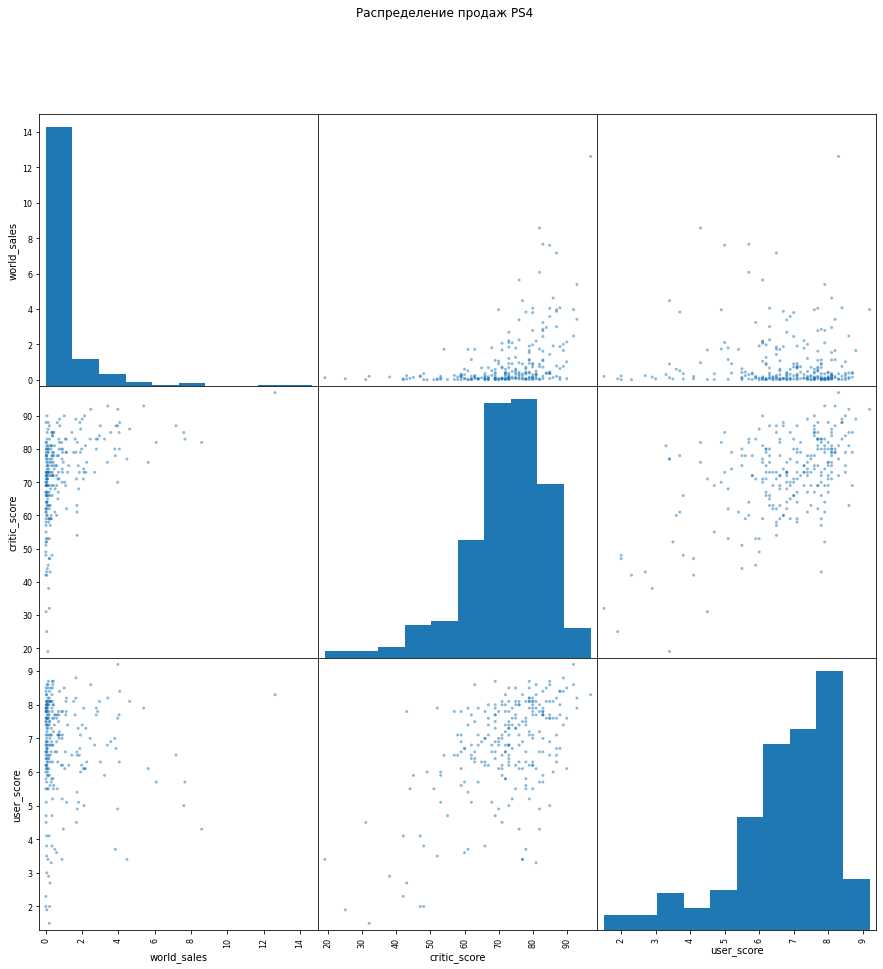

In [37]:
ax = pd.plotting.scatter_matrix(PS4_sales_crit_and_user_ratings, figsize=(15, 15))
plt.suptitle('Распределение продаж PS4')

Для платформы PS4 важными критерием является качество игры. Поэтому есть прямая корреляция между прибылью и рейтингом критиков. Обратная корреляция по игрокам не носит сильного смысла.

Важно заметить, что на мнение игроков влияет рейтинг. То есть, чем выше ценит игру критик, тем выше оценит ее игрок.

In [38]:
PS3_sales_crit_and_user_ratings = PS3_actual_data_games_sales.loc[:,['world_sales', 'critic_score', 'user_score']]
PS3_sales_crit_and_user_ratings.head()

,world_sales,critic_score,user_score
16,21.05,97.0,8.2
69,9.36,71.0,2.6
126,6.46,86.0,4.3
149,5.86,95.0,9.1
180,5.27,NaN,NaN


In [39]:
PS3_sales_crit_and_user_ratings.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.334285,0.002394
critic_score,0.334285,1.000000,0.599920
user_score,0.002394,0.599920,1.000000


Text(0.5, 0.98, 'Распределение продаж PS3')

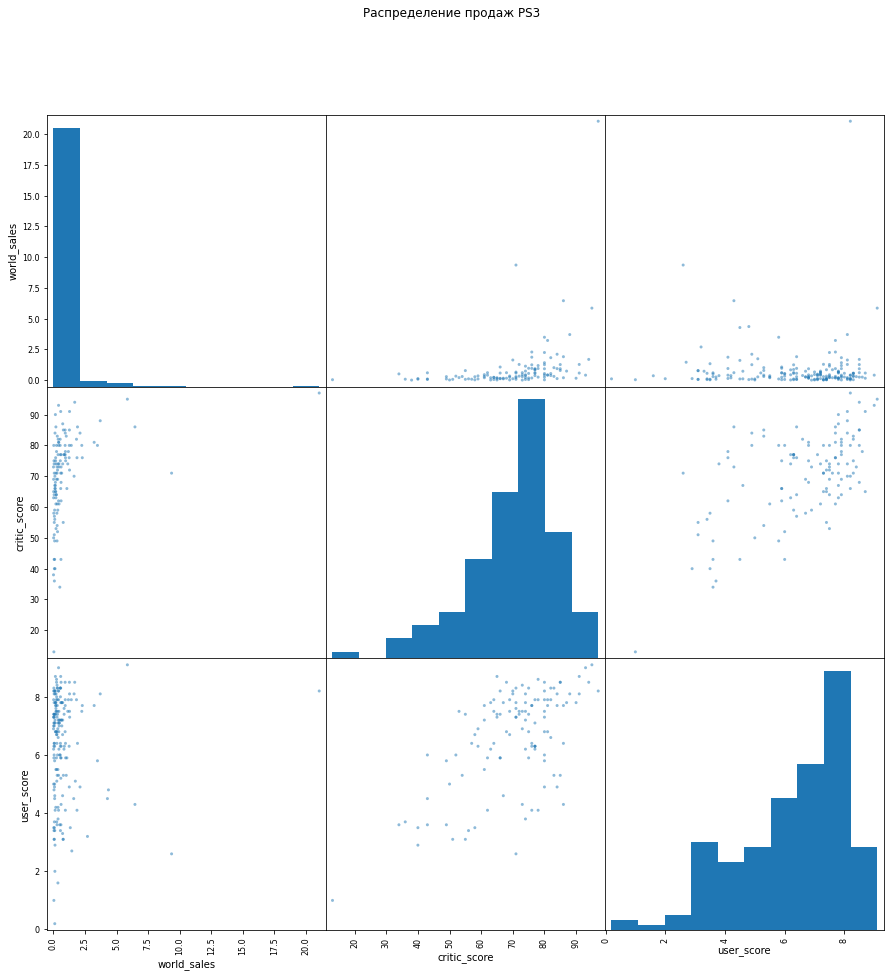

In [40]:
pd.plotting.scatter_matrix(PS3_sales_crit_and_user_ratings, figsize=(15, 15))
plt.suptitle('Распределение продаж PS3')

По платформе PS3 имеются похожие тенденции как и у PS4, только хуже.

In [41]:
XOne_sales_crit_and_user_ratings = XOne_actual_data_games_sales.loc[:,['world_sales', 'critic_score', 'user_score']]
XOne_sales_crit_and_user_ratings.head()

,world_sales,critic_score,user_score
99,7.39,NaN,NaN
165,5.47,97.0,7.9
179,5.26,81.0,5.4
242,4.49,84.0,6.4
270,4.22,88.0,6.2


In [42]:
XOne_sales_crit_and_user_ratings.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


Text(0.5, 0.98, 'Распределение продаж XOne')

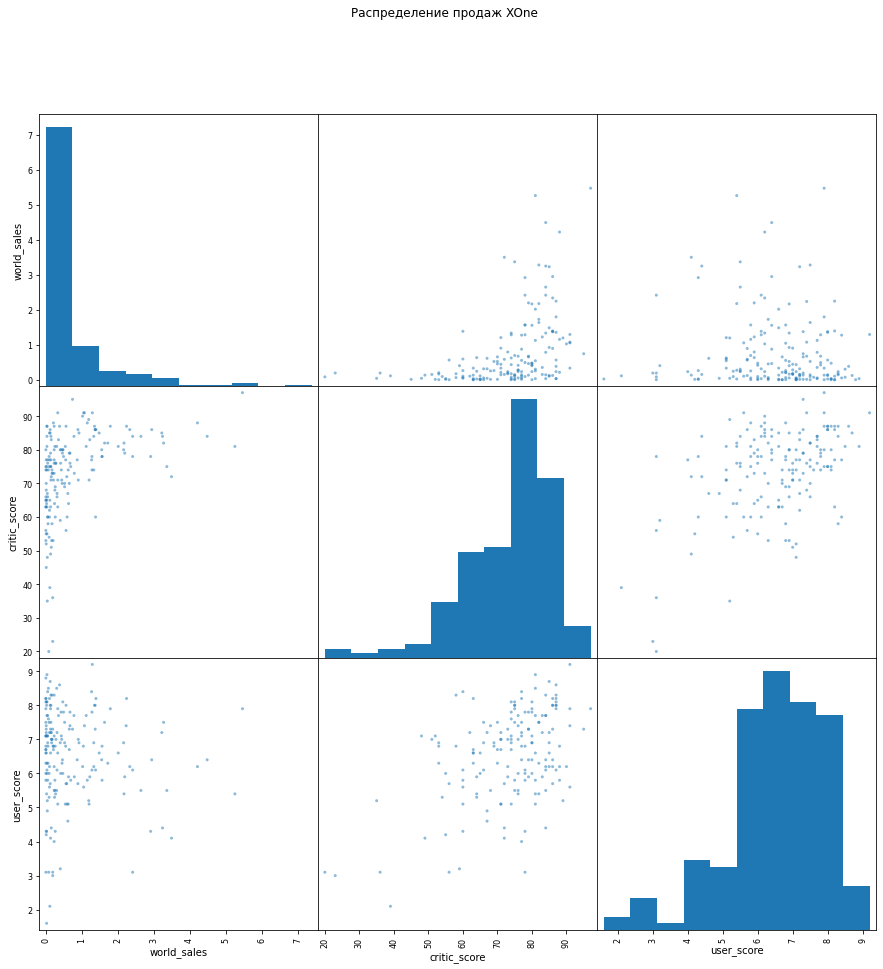

In [43]:
pd.plotting.scatter_matrix(XOne_sales_crit_and_user_ratings, figsize=(15, 15))
plt.suptitle('Распределение продаж XOne')

In [44]:
X360_sales_crit_and_user_ratings = X360_actual_data_games_sales.loc[:,['world_sales', 'critic_score', 'user_score']]
X360_sales_crit_and_user_ratings.head()

,world_sales,critic_score,user_score
23,16.27,97.0,8.1
60,10.24,73.0,2.6
72,9.18,NaN,NaN
263,4.28,NaN,4.9
271,4.22,84.0,4.2


In [45]:
X360_sales_crit_and_user_ratings.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.350345,-0.011742
critic_score,0.350345,1.000000,0.520946
user_score,-0.011742,0.520946,1.000000


Text(0.5, 0.98, 'Распределение продаж X360')

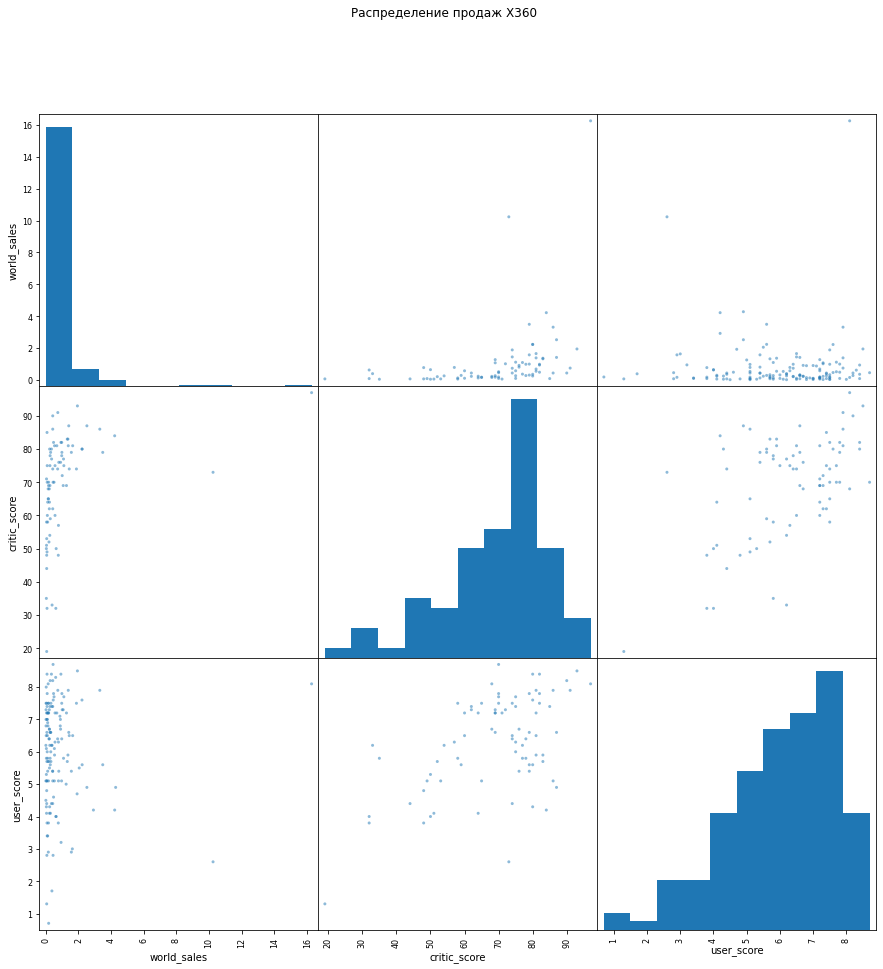

In [46]:
pd.plotting.scatter_matrix(X360_sales_crit_and_user_ratings, figsize=(15, 15))
plt.suptitle('Распределение продаж X360')

In [47]:
_3DS_sales_crit_and_user_ratings = _3DS_actual_data_games_sales.loc[:,['world_sales', 'critic_score', 'user_score']]
_3DS_sales_crit_and_user_ratings.head()

,world_sales,critic_score,user_score
33,14.60,NaN,NaN
47,11.68,NaN,NaN
96,7.55,NaN,NaN
108,7.14,NaN,NaN
184,5.22,NaN,NaN


In [48]:
_3DS_sales_crit_and_user_ratings.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.357057,0.241504
critic_score,0.357057,1.000000,0.769536
user_score,0.241504,0.769536,1.000000


Text(0.5, 0.98, 'Распределение продаж 3DS')

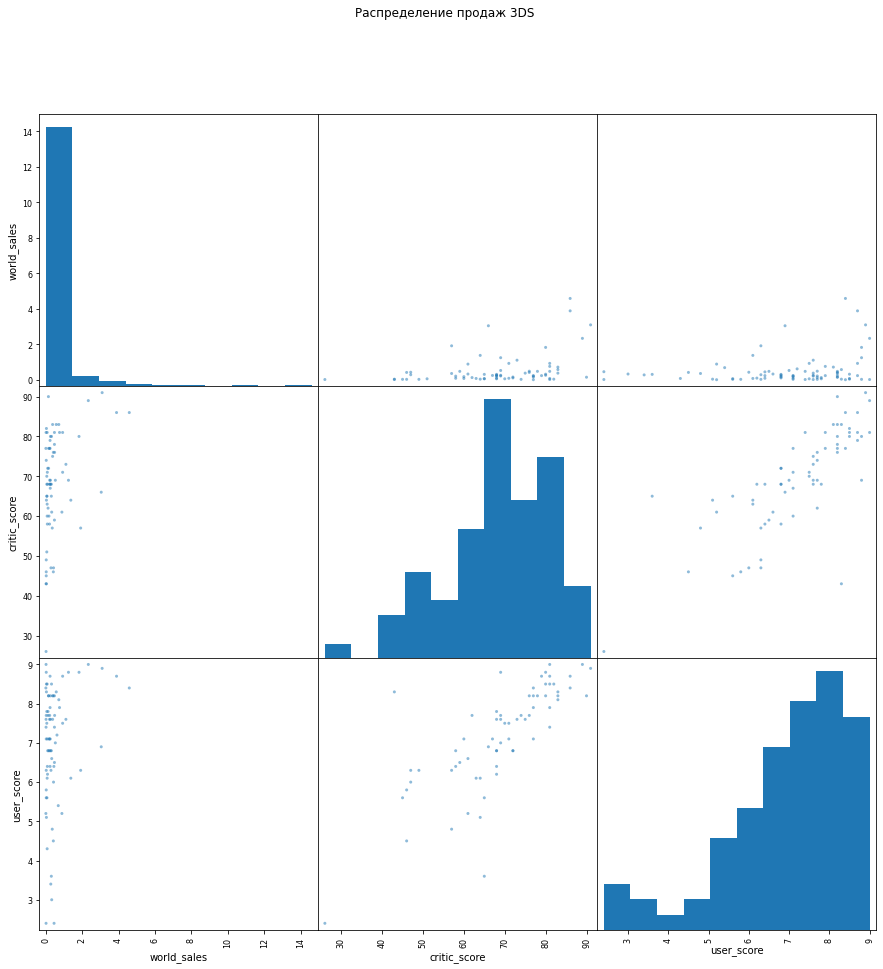

In [49]:
pd.plotting.scatter_matrix(_3DS_sales_crit_and_user_ratings, figsize=(15, 15))
plt.suptitle('Распределение продаж 3DS')

Платформы PS3, XOne и X360 имеют похожие связи, как и у PS4.

Выделяется 3DS, чьи продажи зависят напрямую, хоть и не сильно от рейтинга игроков. Возможно здесь идет лучше работа по составлению рейтинга для игр и системы отзывов для игроков. А может игры в целом очень популярные и интересные и их не очень много, как у других платформ.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> По зависимостям все хорошо 

,world_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


<AxesSubplot:title={'center':'Продажи по жанрам итого'}, xlabel='жанры', ylabel='продажи сумма'>

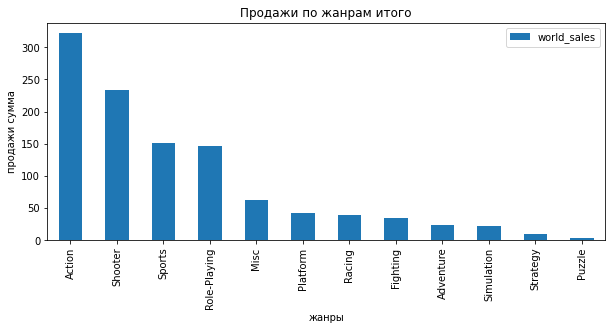

In [50]:
genre_pivot_table = pd.pivot_table(actual_data_games_sales, index='genre', values='world_sales', aggfunc='sum')
genre_pivot_table = genre_pivot_table.sort_values('world_sales', ascending=False)
display(genre_pivot_table)
genre_pivot_table.plot(kind='bar',y='world_sales',title = 'Продажи по жанрам итого', figsize=(10,4),xlabel='жанры',ylabel='продажи сумма')

,world_sales
genre,
Shooter,1.245882
Sports,0.703972
Platform,0.576081
Role-Playing,0.499623
Racing,0.469294
Fighting,0.441375
Action,0.420196
Misc,0.405290
Simulation,0.350968


<AxesSubplot:title={'center':'Средние значения продаж по жанрам'}, xlabel='жанры', ylabel='продажи средняя'>

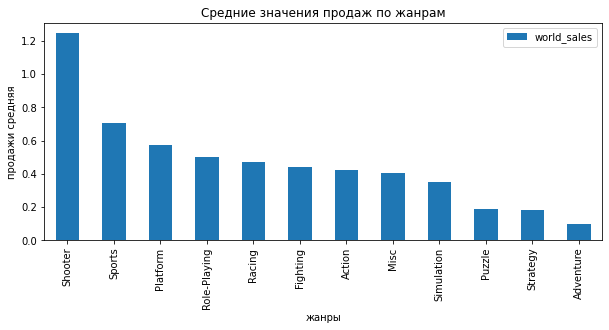

In [51]:
genre_pivot_table = pd.pivot_table(actual_data_games_sales, index='genre', values='world_sales', aggfunc='mean')
genre_pivot_table = genre_pivot_table.sort_values('world_sales', ascending=False)
display(genre_pivot_table)
genre_pivot_table.plot(kind='bar',y='world_sales',title = 'Средние значения продаж по жанрам', figsize=(10,4),xlabel='жанры',ylabel='продажи средняя')

,world_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


<AxesSubplot:title={'center':'Продажи по жанрам, медиана'}, xlabel='жанры', ylabel='продажи медиана'>

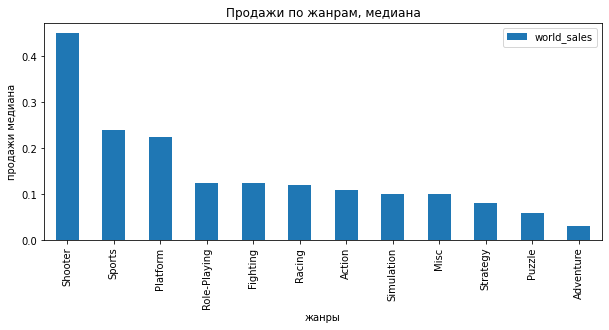

In [52]:
genre_pivot_table = pd.pivot_table(actual_data_games_sales, index='genre', values='world_sales', aggfunc='median')
genre_pivot_table = genre_pivot_table.sort_values('world_sales', ascending=False)
display(genre_pivot_table)
genre_pivot_table.plot(kind='bar',y='world_sales',title = 'Продажи по жанрам, медиана', figsize=(10,4),xlabel='жанры',ylabel='продажи медиана')

Самыми популярными жанрами можно считать экшен(Action), шутеры(Shooter), спортивные игры (Sports) и ролевые игры (Role-Playing) При этом наибольшие средние и медианные значения продаж были зафиксированны для шутеров (Shooter), спортивных игр (Sports), что говорит о большей успешности и перспективности именно этих жанров.

Популярность экшена обусловлена историей создания игр и желания людей проверить свои навыки ловкости и реакции. Очень похожий на него тип жанра Misc.

Популярность шутеров, спортивых игр и ролевых игр обусловлена тем, что в большинстве из них играют несколько игроков одновременно. Так получаются соревнования формата 1х1, 2х2, 3х3, 5х5 и т.д.

Ролевые игры затягивают игроков своей сложностью к прохождению игры и соответсвенно в нее играют часто и даже перепроходят много раз, что увеличивает интерес к будущим дополнениям или повышают вероятность рассказа об этой игре друзьям.

На период 2013-2016 год не пользуются популярностью приключения (Adventure), симуляторы(Simulation) стратегии реального времени или пошаговые (Strategy) и головоломки (Puzzle).

Головоломки были популярны с 80х годов, но сейчас становится все меньше ценителей этого жанра. Текущее поколение хочет захватывающих действий. Приключение, хоть и появилось позже, оно имеет похожую тенденцию.

Симуляторы - это повторение реальной жизни или аспектов реальной жизни сейчас, в прошлом или в будущем. Этот жанр на любителя делать так, как ему хочется.

Стратегии редко когда поднимаются в рейтингах по продажам в ввиду еще большей трудности и иногда неторопливости процесса.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1 <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  А рассмотрим успешность продаж? Высокие продажи могут быть вызваны не успехом, а просто огромным количеством игр. Вполне могут быть жанры, где игр немного, но при этом продажи сопоставимы с продажами Экшена. Чтобы проверить это, стоит рассмотреть средние или медианные продажи

<div class="alert alert-info">
<b>Посчитала средние и медианы, добавила выводы</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> +++

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1 <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Не забывай о визуализациях

<div class="alert alert-info">
<b>Добавила везде графики</b> 
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v2 <a class="tocSkip"></h2>
   
<b>На доработку🤔:</b> Необходимо доработать оформление

<div class="alert alert-info">
<b>Хорошо, добавила заголовки и подписи осей</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v3 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Идеально

Вывод:
Были даны ответы на все поставленые вопросы и рассуждения подкреплены обоснованиями.

Обобщенный вывод на 2017 год ожидается подъем продаж по PS4, XOne и 3DS, так как уже многие студии-разработчики нашли применения своих техологий на этих платформах и хотят попасть на все рынки.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1 <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Необходимо доработать замечания

<div class="alert alert-info">
<b>Поправила вывод по изменениям</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v3 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Все замечания учтены

#### Шаг 4. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [53]:
na_actual_data_games_sales = actual_data_games_sales.query('na_sales > 0')
na_actual_data_games_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 16 to 16672
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1309 non-null   object 
 1   platform         1309 non-null   object 
 2   year_of_release  1309 non-null   int64  
 3   genre            1309 non-null   object 
 4   na_sales         1309 non-null   float64
 5   eu_sales         1309 non-null   float64
 6   jp_sales         1309 non-null   float64
 7   other_sales      1309 non-null   float64
 8   critic_score     809 non-null    float64
 9   user_score       974 non-null    float64
 10  rating           1309 non-null   object 
 11  world_sales      1309 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 132.9+ KB


In [54]:
eu_actual_data_games_sales = actual_data_games_sales.query('eu_sales > 0')
eu_actual_data_games_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 16 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1422 non-null   object 
 1   platform         1422 non-null   object 
 2   year_of_release  1422 non-null   int64  
 3   genre            1422 non-null   object 
 4   na_sales         1422 non-null   float64
 5   eu_sales         1422 non-null   float64
 6   jp_sales         1422 non-null   float64
 7   other_sales      1422 non-null   float64
 8   critic_score     872 non-null    float64
 9   user_score       1047 non-null   float64
 10  rating           1422 non-null   object 
 11  world_sales      1422 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 144.4+ KB


In [55]:
jp_actual_data_games_sales = actual_data_games_sales.query('jp_sales > 0')
jp_actual_data_games_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1187 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1187 non-null   object 
 1   platform         1187 non-null   object 
 2   year_of_release  1187 non-null   int64  
 3   genre            1187 non-null   object 
 4   na_sales         1187 non-null   float64
 5   eu_sales         1187 non-null   float64
 6   jp_sales         1187 non-null   float64
 7   other_sales      1187 non-null   float64
 8   critic_score     410 non-null    float64
 9   user_score       462 non-null    float64
 10  rating           1187 non-null   object 
 11  world_sales      1187 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 120.6+ KB


Найдем по каждому региону популярную платформу.

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20
WiiU,29.21
PC,11.11
Wii,6.56
PSV,5.04


<AxesSubplot:title={'center':'Продажи по платформам, Северная Америка'}, xlabel='платформы', ylabel='продажи'>

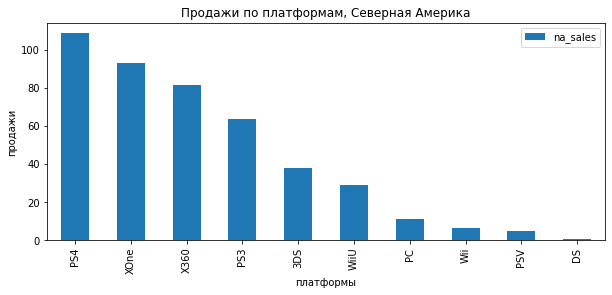

In [56]:
na_platform_pivot_table = pd.pivot_table(na_actual_data_games_sales, index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)
display(na_platform_pivot_table)
na_platform_pivot_table.plot(kind='bar',y='na_sales',title = 'Продажи по платформам, Северная Америка', figsize=(10,4),xlabel='платформы',ylabel='продажи')

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96
PC,25.36
WiiU,19.85
PSV,6.10
Wii,5.93


<AxesSubplot:title={'center':'Продажи по платформам, Европа'}, xlabel='платформы', ylabel='продажи'>

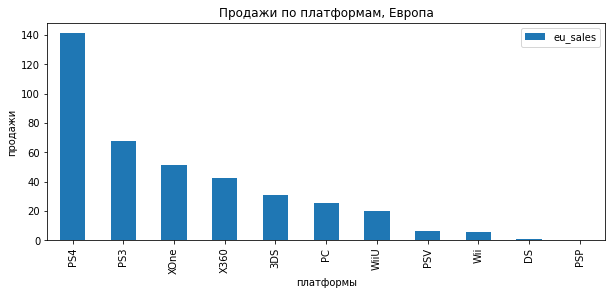

In [57]:
eu_platform_pivot_table = pd.pivot_table(eu_actual_data_games_sales, index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)
display(eu_platform_pivot_table)
eu_platform_pivot_table.plot(kind='bar',y='eu_sales',title = 'Продажи по платформам, Европа', figsize=(10,4),xlabel='платформы',ylabel='продажи')

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88
PSP,3.29
X360,0.51
XOne,0.34
Wii,0.05


<AxesSubplot:title={'center':'Продажи по платформам, Япония'}, xlabel='платформы', ylabel='продажи'>

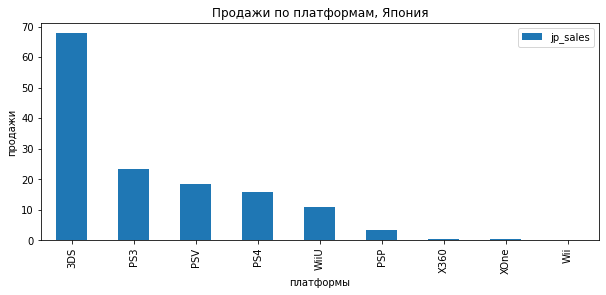

In [58]:
jp_platform_pivot_table = pd.pivot_table(jp_actual_data_games_sales, index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)
display(jp_platform_pivot_table)
jp_platform_pivot_table.plot(kind='bar',y='jp_sales',title = 'Продажи по платформам, Япония', figsize=(10,4),xlabel='платформы',ylabel='продажи')

Рейтинг платформ:

Топ 5 по Северной Америке: PS4, XOne, X360, PS3 и 3DS
Топ 5 по Европейскому региону: PS4, PS3, XOne, X360 и 3DS
Топ 5 по Японии: 3DS, PS3, PSV, PS4 и WiiU
Различия по популярности платформ в первую очередь зависят от влияния фирмы. Как результат во всех рейтингах есть продукция компании Sony.

Во-вторых - местоположение компании. Популярность XOne и X360 в Америке обусловлена крупным игроком на рынке в регионе - компания Microsoft. В Японии похожее положение занимает компания Nintendo c двумя продуктами 3DS и WiiU. Европейский рынок смотрит на общую популярность платформы, так как как нет крупных компаний по разработке платформ.

На Американском рынке по продажам соревнуются PS4 и XOne. Это вечные конкуренты и компания Microsoft не хочет отставать по продажам в своем регионе. В Европе нет такой сильной конкуренции - люди выбирают лучший и популярный продукт PS4. В Японии высокая конкуренция Nintendo и Sony за пользователей. Как видно у первой компании есть успехи в родном регионе. Но плохие показатели за его пределами. В целом продажи меньше, так как в этом регионе меньше игроков.

Найдем по каждому региону популярный жанр.

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49
Platform,18.14
Fighting,15.55
Racing,12.96
Adventure,7.14


<AxesSubplot:title={'center':'Продажи по жанрам, Северная Америка'}, xlabel='жанры', ylabel='продажи'>

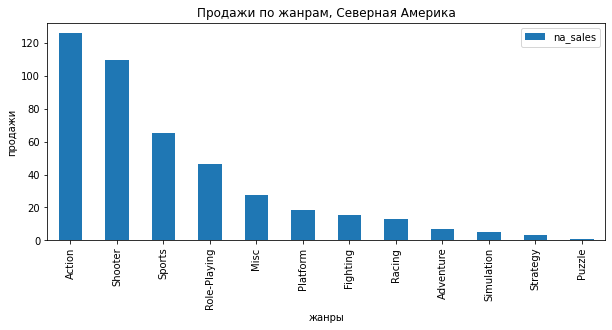

In [59]:
na_genre_pivot_table = pd.pivot_table(na_actual_data_games_sales, index='genre', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)
display(na_genre_pivot_table)
na_genre_pivot_table.plot(kind='bar',y='na_sales',title = 'Продажи по жанрам, Северная Америка', figsize=(10,4),xlabel='жанры',ylabel='продажи')

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19
Misc,20.04
Platform,15.58
Simulation,10.92
Fighting,8.55


<AxesSubplot:title={'center':'Продажи по жанрам, Европа'}, xlabel='жанры', ylabel='продажи'>

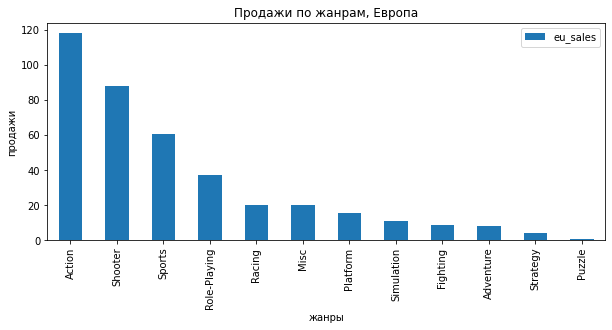

In [60]:
eu_genre_pivot_table = pd.pivot_table(eu_actual_data_games_sales, index='genre', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)
display(eu_genre_pivot_table)
eu_genre_pivot_table.plot(kind='bar',y='eu_sales',title = 'Продажи по жанрам, Европа', figsize=(10,4),xlabel='жанры',ylabel='продажи')

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61
Adventure,5.82
Sports,5.41
Platform,4.79
Simulation,4.52


<AxesSubplot:title={'center':'Продажи по жанрам, Япония'}, xlabel='жанры', ylabel='продажи'>

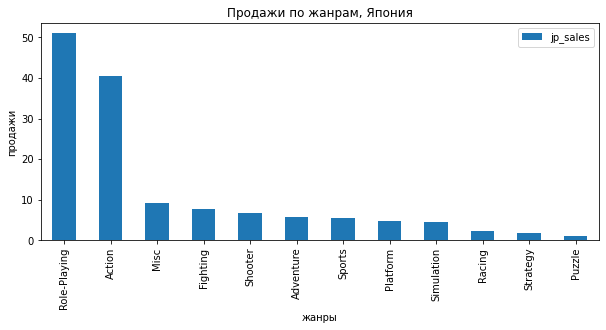

In [61]:
jp_genre_pivot_table = pd.pivot_table(jp_actual_data_games_sales, index='genre', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)
display(jp_genre_pivot_table)
jp_genre_pivot_table.plot(kind='bar',y='jp_sales',title = 'Продажи по жанрам, Япония', figsize=(10,4),xlabel='жанры',ylabel='продажи')

Рейтинг жанров:

Топ 5 по Северной Америке: Action, Shooter, Sports, Role-Playing и Misc
Топ 5 по Европейскому региону: Action, Shooter, Sports, Role-Playing и Racing
Топ 5 по Японии: Role-Playing, Action, Misc, Fighting и Shooter
По классификации Кроуфорда miscellaneous game (Misc) - игры в категории skill-and-action. Они не относятся к боевым играм(Combat),играм с выходом из лабиринта(Maze), спортивным играм(Sports), играм на удержание мяча(Paddle) или гонкам(Race). Это новые игры, где проверяется ловкость и реакция игрока другими способами.

Американские и европейские игроки имеют схожите тенденции по жанрам в целом. Японские отличаются от них большим вкладом в игры с глубоким смыслом. Вне зависимости от региона всегда будут популярны игры экшен, т.к. многие поколения выросли на этом жанре, и шутеры, т.к. это имитация боевых действий.

Найдем влияние рейтинга на каждый регион.

,na_sales
rating,
M,184.77
E,102.09
T,96.61
E10+,54.24


<AxesSubplot:title={'center':'Продажи по рейтингу, Северная Америка'}, ylabel='na_sales'>

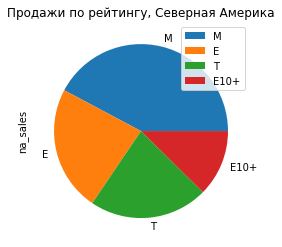

In [62]:
na_rating_pivot_table = pd.pivot_table(na_actual_data_games_sales, index='rating', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)
display(na_rating_pivot_table)
na_rating_pivot_table.plot(kind='pie',y='na_sales',title = 'Продажи по рейтингу, Северная Америка')

,eu_sales
rating,
M,162.21
E,108.37
T,78.96
E10+,42.69


<AxesSubplot:title={'center':'Продажи по рейтингу, Европа'}, ylabel='eu_sales'>

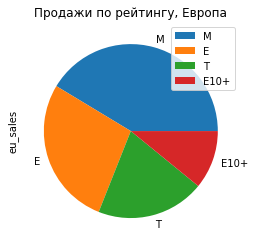

In [63]:
eu_rating_pivot_table = pd.pivot_table(eu_actual_data_games_sales, index='rating', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)
display(eu_rating_pivot_table)
eu_rating_pivot_table.plot(kind='pie',y='eu_sales',title = 'Продажи по рейтингу, Европа')

,jp_sales
rating,
T,86.62
E,33.35
M,14.92
E10+,5.89


<AxesSubplot:title={'center':'Продажи по рейтингу, Япония'}, ylabel='jp_sales'>

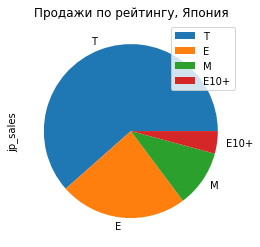

In [64]:
jp_rating_pivot_table = pd.pivot_table(jp_actual_data_games_sales, index='rating', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)
display(jp_rating_pivot_table)
jp_rating_pivot_table.plot(kind='pie',y='jp_sales',title = 'Продажи по рейтингу, Япония')

Рейтинг возраста влияет по каждому региону.

В Америке и Европе схожие ситуации - в первую очередь популярны игры с возрастным рейтингом 17+. Это означает, что эти рынки ориентированы на взрослых пользователей.

В Японии лидириуют игры с возрастным рейтингом 13+. Компании хотят распространить свое влияние на новое поколение.

Вывод:
Проведя анализ по регионам можно составить портрет игрока.

Американский игрок - от 17 лет, любит играть или на PS4, или на XOne, любит игры на реакцию и шутеры. Европейский игрок - от 17 лет, любит играть на PS4, любит игры на реакцию и шутеры. Японский игрок - от 13 лет, любит играть на переносных платформах 3DS или PSV, любит тратить время на RPG и экшены.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1 <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Необходимо визуализировать весь раздел 

<div class="alert alert-info">
<b>Окей, добавила графики</b> 
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v2 <a class="tocSkip"></h2>
   
<b>На доработку🤔:</b> Топ! Но оформления не хвататет( 

<div class="alert alert-info">
<b>Исправила</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v3 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Доработано

#### Шаг 5. Проверка гипотез

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.


Подготовим данные по первой гипотезе. Не будем учитывать игры с пустым рейтингом.

In [65]:
def stat_info(serie, bins=0):
    serie_description = serie.describe()
    mean = serie_description[1]
    std = serie_description[2]
    d_min = serie_description[3]
    q1 = serie_description[4]
    median = serie_description[5]
    q3 = serie_description[6]
    d_max = serie_description[7]
    left_border = d_min
    right_border = d_max
    if bins == 0:
        bins = right_border - left_border
        if bins>100:
            bins = 100
        elif bins < 1:
            bins = abs(bins*10)+1
        bins = int(bins)
    else:
        bins = bins
    serie.hist(bins=bins, range=(left_border, right_border))
    print(serie_description)
    variance_estimate = np.var(serie, ddof=1)
    standart_dev = np.std(serie, ddof=1)
    print('Среднее значение: {:.2f}'.format(mean))
    print('Дисперсия: {:.2f}'.format(variance_estimate))
    print('Стандартное отклонение: {:.2f}'.format(standart_dev))
    return [mean, variance_estimate, standart_dev]

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64
Среднее значение: 6.52
Дисперсия: 1.91
Стандартное отклонение: 1.38


[6.521428571428572, 1.9069968429360695, 1.380940564592144]

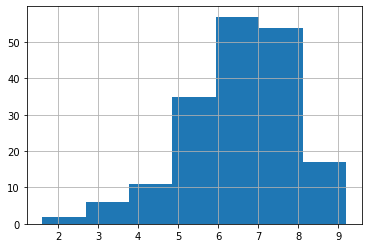

In [66]:
user_rating_XOne = actual_data_games_sales.query('platform == "XOne"')['user_score'].dropna()
stat_info(user_rating_XOne)

count    155.000000
mean       6.269677
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64
Среднее значение: 6.27
Дисперсия: 3.04
Стандартное отклонение: 1.74


[6.2696774193548395, 3.035892752408882, 1.7423813452883619]

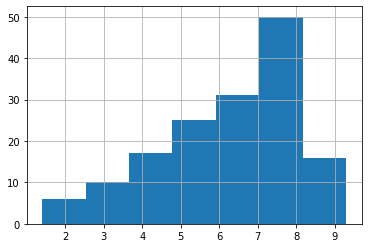

In [67]:
user_rating_PC = actual_data_games_sales.query('platform == "PC"')['user_score'].dropna()
stat_info(user_rating_PC)

На первый взгляд средние похожи, но вот дисперсия выборок отличается.

Нулевая гипотеза первой гипотезы гласит: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".

Альтернативная гипотеза гласит: "Средние пользовательские рейтинги платформ Xbox One и PC различаются".

Для оценки гипотезы будем применять тест Стюдента. Соотвественно, мы можем получить два ответа "Отвергаем нулевую гипотезу" и "Не получилось отвергнуть нулевую гипотезу".

При получении ответа "Отвергаем нулевую гипотезу" это будет говорить о том, что гипотеза противоречит эмпирическим данным и скорей всего наше предположение неверно. Значит данные различаются.

При получении ответа "Не получилось отвергнуть нулевую гипотезу", это значит что предположение о равенстве среднего рейтинга верно.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Гипотезы сформлуированы верно 

In [68]:
alpha = .01

results = st.ttest_ind(user_rating_XOne, user_rating_PC)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Рейтинги в целом похожи друг на друга, что и подтверждает нулевая гипотеза.

Подготовим данные для жанров Action и Sports.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Верно!

count    389.000000
mean       6.837532
std        1.330173
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64
Среднее значение: 6.84
Дисперсия: 1.77
Стандартное отклонение: 1.33


[6.837532133676092, 1.7693609042482705, 1.3301732609883083]

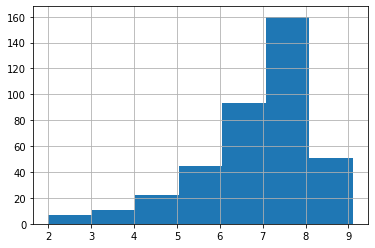

In [69]:
user_rating_Action = actual_data_games_sales.query('genre == "Action"')['user_score'].dropna()
stat_info(user_rating_Action)

count    160.000000
mean       5.238125
std        1.783427
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64
Среднее значение: 5.24
Дисперсия: 3.18
Стандартное отклонение: 1.78


[5.238124999999999, 3.180612814465409, 1.7834272663793747]

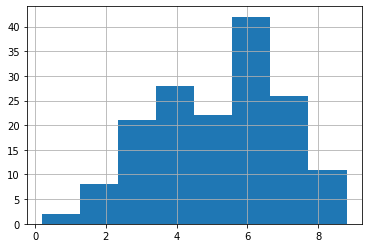

In [70]:
user_rating_Sports = actual_data_games_sales.query('genre == "Sports"')['user_score'].dropna()
stat_info(user_rating_Sports)

На первый взгляд по статистическим данным все отличается.

Нулевая гипотеза первой гипотезы гласит: "Средние пользовательские рейтинги жанров Action и Sports одинаковые".

Альтернативная гипотеза гласит: "Средние пользовательские рейтинги жанров Action и Sports различаются".

Для оценки гипотезы будем применять тест Стюдента. Соотвественно, мы можем получить два ответа "Отвергаем нулевую гипотезу" и "Не получилось отвергнуть нулевую гипотезу".

При получении ответа "Отвергаем нулевую гипотезу" это будет говорить о том, что гипотеза противоречит эмпирическим данным и скорей всего наше предположение неверно. Значит данные различаются.

При получении ответа "Не получилось отвергнуть нулевую гипотезу", это значит что предположение о равенстве среднего рейтинга верно.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Гипотезы сформулированы верно 

In [71]:
alpha = .01

results = st.ttest_ind(user_rating_Action, user_rating_Sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Тест Стьюдента подтвердил наши догадки о различиях между выбранными жанрами.

Вывод по шагу.
Первая и вторая гипотезы подтвердились.

Платформа XOne старается из года в год набирать новых пользователей, чтобы соревноваться не только с PS4, но и с самой распространненной платформой на земле PC. На 2016 год по качеству игр они близки к компьютерным.

Различия между Action и Sports существуют из-за опыта создания игр. Первые экшены появились в 80х годах и из года в год они становятся интересней, так как им есть на что ровняться в прошлом. У спортивных игр в большинстве случаев ограничением в рейтингах стоит симуляция реальных спортивных игр. И любителям этой серии иногда приходиться сталкиваться с непонятными решениями в этих играх.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> +++

#### Итоговый вывод
В ходе проделанной работы было выполнено:

Просмотрена таблица, выявлены аномалии и пропущенные значения.
Проведена предобработка таблицы: замена столбцов, заполнение пропусков, удаление дубликатов и т.д.
Проведен анализ по данным и подготовлены актуальные данные.
Составлены портреты пользователей для купных регионов продаж.
Выполнены проверки гипотез.
Продажи компьютерных игр зависят от трех основных составляющих: кто игру создал, на какой платформе она сделана и какого она жанра.

По первому пунку сейчас популярны компании, которые уже давно разрабатывают игры. Они используют свои любимые жанры и уже накопили аудиторию фанатов, которая обязательно купит их игру.
Платформа определяет технические возможности разработчиков. Здесь есть прямая зависимость: лучше платформа значит можно сделать игру лучше. Жизненный цикл в 5-12 лет обусловлен скачками в технологиях процессора, оперативной и видеопамяти.
Жанр - это то, что выбирает игрок. Каждый человек уникален, и не каждому игроку будет по душе одновременно стратегия и шутеры. Соответсвенно студии-разработчики и издатели боряться за целевую аудиторию своего продукта.
Сводный анализ для кампании на 2017 год.

Делать ставку на современные платформы. Покупать вышедшие и новые игры на PS4, XOne и 3DS.
Выставлять на прилавки популярные жанры - экшен, шутеры, спортивные и ролевые игры.
Следить за своей аудиторией. В основом большинство игр рассчитано на игроков, которым 17 лет и старше.
Не забывать распространять компьютерные игры и портации игр с популярных платформ на PC. Компьютер еще долго не выйдет из конкуренции за игроков.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1 <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Необходимо доработать замечания

<div class="alert alert-info">
<b>Все поправила</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v3 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Вывод отражает проделанную работу!

<div style="border:solid Chocolate 2px; padding: 40px">
    
**Общий вывод по проекту ревьювера**:
Полина, спасибо за  проект! Ты приложила много усилий, чтобы довести его до конца, проделана огромная работа, и это видно невооруженным глазом, ты большая молодец!
    
**Отмечу положительные моменты**:
    
    1. Все разложено по полочкам, всегда понятен ход твоих мыслей, приятно смотреть
    
    2. Отличные визуализации
    
    3. На разных шагах проекта ты предлагала очень интересные решения и методы для их реализации. Хорошая работа!
    
    
**На что стоит обратить внимание**:
    
    1. Неверно определены успешные продажи по жанрам
    
    2. Отсутсвуют визуализации
    
    
**Удачи и жду твой проект на повторное ревью!**

<div style="border:solid Chocolate 2px; padding: 40px">
    
**Общий вывод по проекту ревьювера v2**:
Полина, исправим оставшиеся замечания и проект будет зачтен) 

<div class="alert alert-info">
<b>Все доработала</b> 
</div>

<div style="border:solid Chocolate 2px; padding: 40px">
    
**Общий вывод по проекту ревьювера v3**:
Полина, ошибки исправлены, проект принят, поздравляю тебя! Успешной учебы и еще увидимся в Практикуме!